In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

Sliding Window Embedding is a way to take some one dimensional function, say $f(x)$ and embedd the signal into a higher dimensional space in order to make global (topological) features easier to recognize. The idea behind the sliding window is very simple: 

If we wish to embed a two dimensional signal into 2 dimensions, loop over the data and take every (i, i+1) pair to be points $R^2$. 

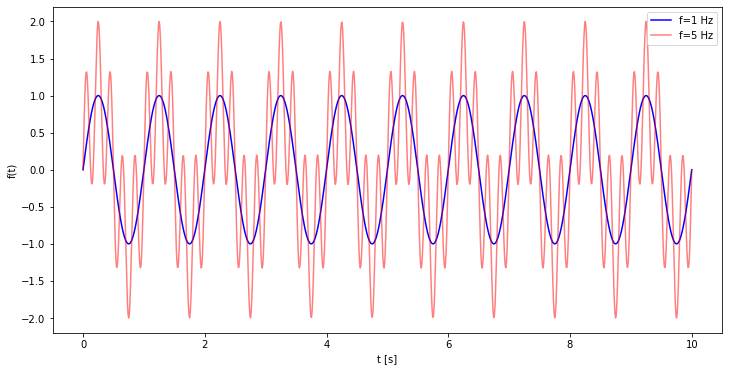

In [2]:
# first create the sample function. We will impose some periodicity to see what structures appear in R2 and R3
t = np.linspace(0, 10, 1000)

f1 = 1 #Hz
f2 = 5  
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

y1 = np.sin(w1*t)
y2 = y1+np.sin(w2*t)
plt.figure(figsize=(12,6))
plt.plot(t,y1, 'b', label='f={0} Hz'.format(f1))
plt.plot(t,y2, 'r', alpha=0.5, label='f={0} Hz'.format(f2))
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

From this data, we shall now construct various 2d representations. 

In [3]:
x = [1, 2, 3, 4]
for i in range(3): 
    print(np.roll(x,-i))

[1 2 3 4]
[2 3 4 1]
[3 4 1 2]


In [4]:
def embed_2d(y, window_length=1, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-(window_length+1): 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append([y_shift[0], y_shift[window_length]])
        
    return np.array(pts)

In [5]:
def plot_emb(win_len=1):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    emb1 = embed_2d(y1, window_length=win_len)
    emb2 = embed_2d(y2, window_length=win_len)
    ax[0].plot(emb1[:,0], emb1[:,1])
    ax[1].plot(emb2[:,0], emb2[:,1])
    
    ax[0].set_xlabel('t')
    ax[1].set_xlabel('t')
    ax[0].set_ylabel('y1')
    ax[1].set_ylabel('y2')
    
    ax[0].set_aspect('equal')
    ax[1].set_aspect('equal')


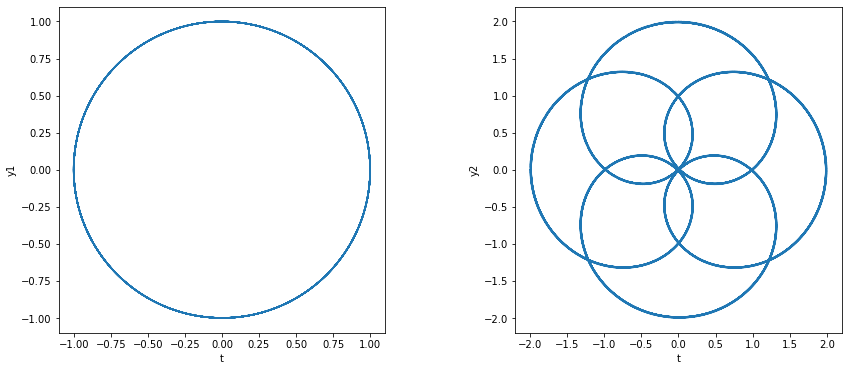

In [6]:
plot_emb(25)

In [7]:
def embed_Nd(y, N=2, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-N: 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append(y_shift[0:N])
        
    return np.array(pts)

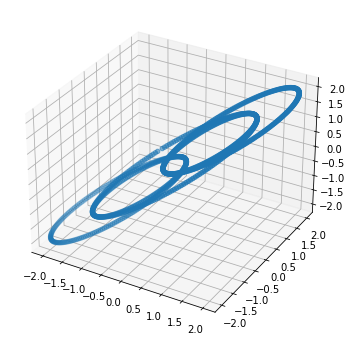

(998, 3)


In [8]:
from mpl_toolkits.mplot3d import Axes3D
emb3 = embed_Nd(y2, N=3)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb3[:,0], emb3[:,1], emb3[:,2])

plt.show()
print(emb3.shape)

Finally, let's do the same thing but with 4 dimeions using a colormap for the extra dim. 

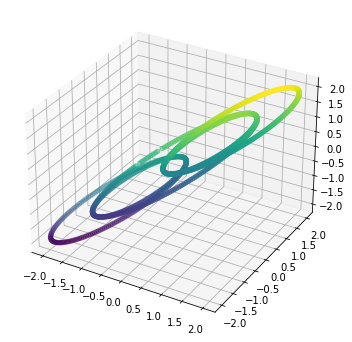

(997, 4)


In [9]:
emb4 = embed_Nd(y2, N=4)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb4[:,0], emb4[:,1], emb4[:,2], c=emb4[:,3])

plt.show()
print(emb4.shape)

# Persistance Diagrams

(1000,) (997, 4)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Persistance Diagram for y=sin(t)+sin(5t)')

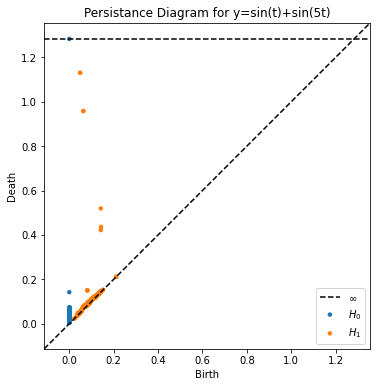

In [10]:
import ripser
from ripser import Rips
import persim

from persim import plot_diagrams

print(y2.shape, emb4.shape)

plt.figure(figsize=(12,6))

# standard scikit-learn syntax
rips = Rips()
diagrams = rips.fit_transform(emb4)
rips.plot(diagrams)

plt.title('Persistance Diagram for y=sin(t)+sin(5t)')

# Mapper

In [11]:
import kmapper as km

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(emb4, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, emb4, nr_cubes=10)

# Visualize it
mapper.visualize(graph, path_html="embedded_4d_sin_output.html",
                 title="slidding window embedded sin wave")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (997, 4)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (997, 4) using lens shaped (997, 2)

Creating 100 hypercubes.

Created 42 edges and 36 nodes in 0:00:00.033397.
Wrote visualization to: embedded_4d_sin_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>slidding window embedded sin wave | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppe

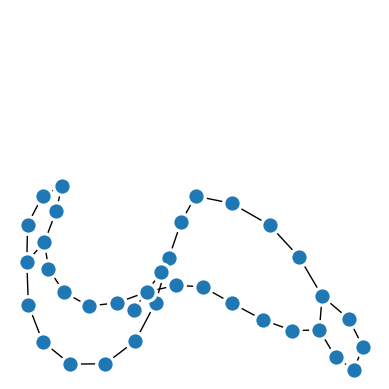

In [12]:


km.draw_matplotlib(graph)

In [13]:
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen
jupyter.display(path_html="embedded_4d_sin_output.html")

/usr/lib/python3/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Comparing persistance diagrams 

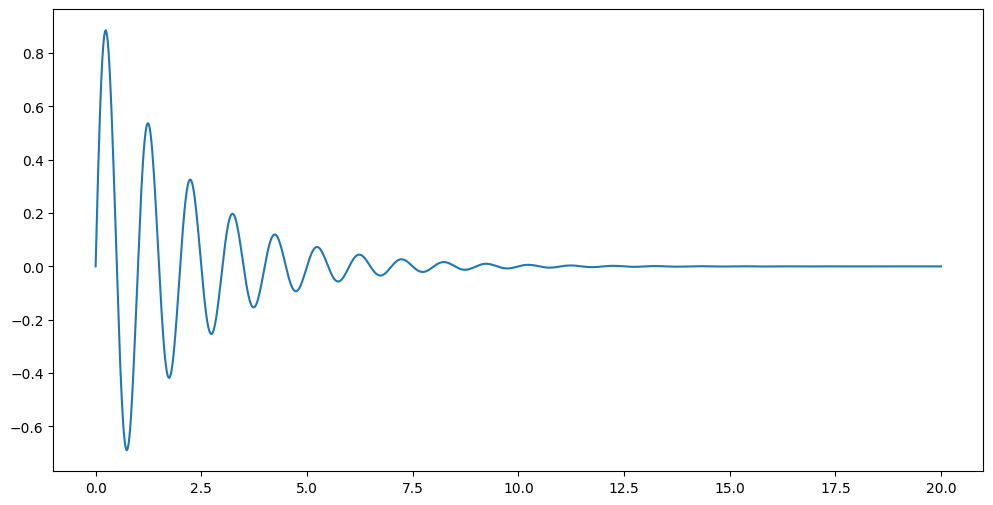

In [14]:
tf = 20
ts = np.linspace(0, tf, 1000)
f1 = 1 #Hz
w1 = 2*np.pi*f1
y1 = np.sin(w1*ts)
y = y1*np.exp(-0.5*ts)


plt.figure(figsize=(12,6))
plt.plot(ts, y)
plt.show()

In [15]:
# for analysis, create 2 second windows
def plot_persistance_decay(t1=0, t2=5, dt=1):
    dN = int(len(ts)*(dt/tf))
    N1 = int(len(ts)*(t1/tf))
    N2 = int(len(ts)*(t2/tf))
                
    
    f1 = y[N1:N1+dN]
    f2 = y[N2:N2+dN]
        
    # embed into 4-d
    emb_1 = embed_Nd(f1, N=4)
    emb_2 = embed_Nd(f2, N=4)
    
    # create persistance diagram
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    ax[0].plot(ts, y)
    ax[0].axvspan(ts[N1], ts[N1+dN], alpha=0.15, color='blue')
    ax[0].axvspan(ts[N2], ts[N2+dN], alpha=0.15, color='red')
    ax[0].set_ylabel('Signal')
    ax[0].set_xlabel('t')
    
    # standard scikit-learn syntax
    plt.sca(ax[1])
    
    dgm_1 = ripser.ripser(emb_1)['dgms'][1]
    dgm_2 = ripser.ripser(emb_2)['dgms'][1]
    
    
    persim.visuals.plot_diagrams([dgm_1, dgm_2], labels=['$H_1$ for $t_1$={:.2f}'.format(t1), '$H_1$ for $t_2$={:.2f}'.format(t2)])

    ax[1].set_title('Persistence Diagrams for Circular Topology ($H_1$)')
    

In [16]:
ti = np.linspace(0, 10, 200) 
print("There will be {} frames".format(len(ti)))
i=0
for t_i in ti: 
    print(i)
    plot_persistance_decay(0, t_i, 2)
    plt.savefig('./frames/output-{:04d}.png'.format(i))
    plt.close()
    i+= 1 

There will be 200 frames
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


# Now let's plot the different types of features: 

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


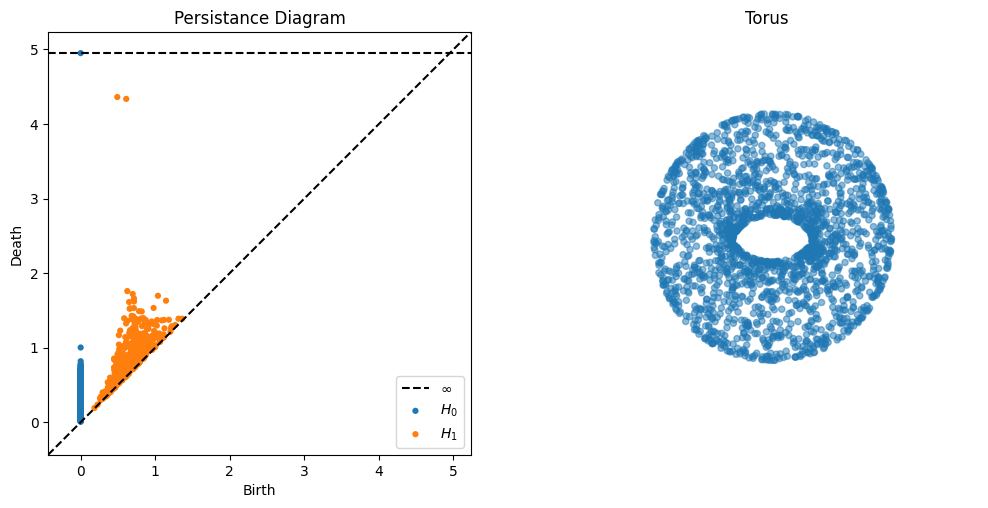

In [27]:


fig = plt.figure(figsize=(12,10)) # twice as wide as it is tall
ax = fig.add_subplot(1, 2, 1, )
torus = tadasets.torus(n=2000, c=5, a=2.5)
rips = Rips()
diagrams = rips.fit_transform(torus)
rips.plot(diagrams)
ax.set_title('Persistance Diagram')

ax = fig.add_subplot(1, 2, 2, projection='3d')
#tadasets.plot3d(torus, alpha=0.5)
ax.scatter(torus[:,0], torus[:,1], torus[:,2], alpha=0.5)
ax.view_init(elev=67.5, azim=0)
ax.grid('off')
ax.axis('off')
ax.set_title('Torus')
plt.savefig('./persistence-torus.pdf')


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


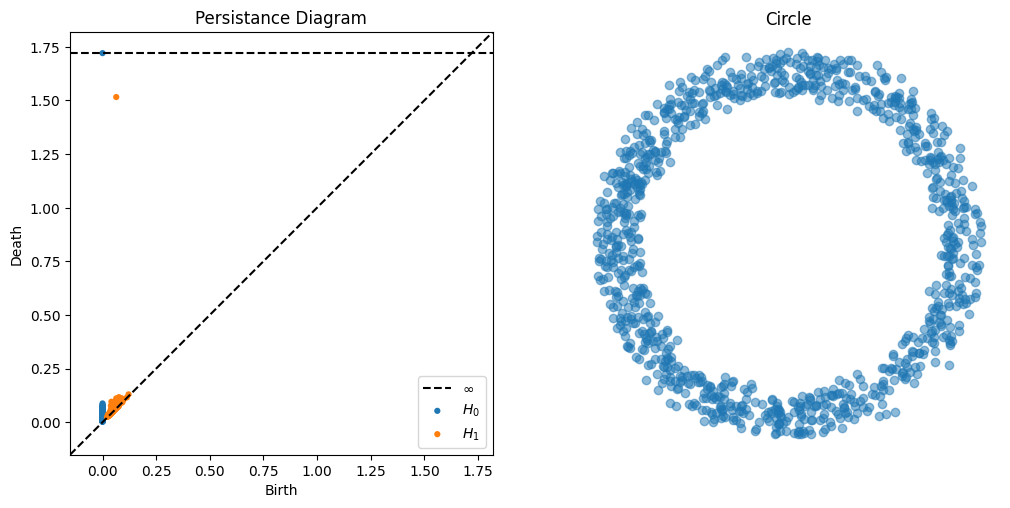

In [28]:
fig = plt.figure(figsize=(12,10)) 
ax = fig.add_subplot(1, 2, 1, )

theta = 2*np.pi*np.random.rand(1000)
x = np.cos(theta)+0.25*np.random.rand(1000)
y = np.sin(theta)+0.25*np.random.rand(1000)

circle = np.array([x, y]).T


rips = Rips()
diagrams = rips.fit_transform(circle)
rips.plot(diagrams)
ax.set_title('Persistance Diagram')

ax = fig.add_subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)
ax.grid('off')
ax.axis('off')
ax.set_title('Circle')
ax.set_aspect('equal')
plt.savefig('./persistence-circle.pdf')


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


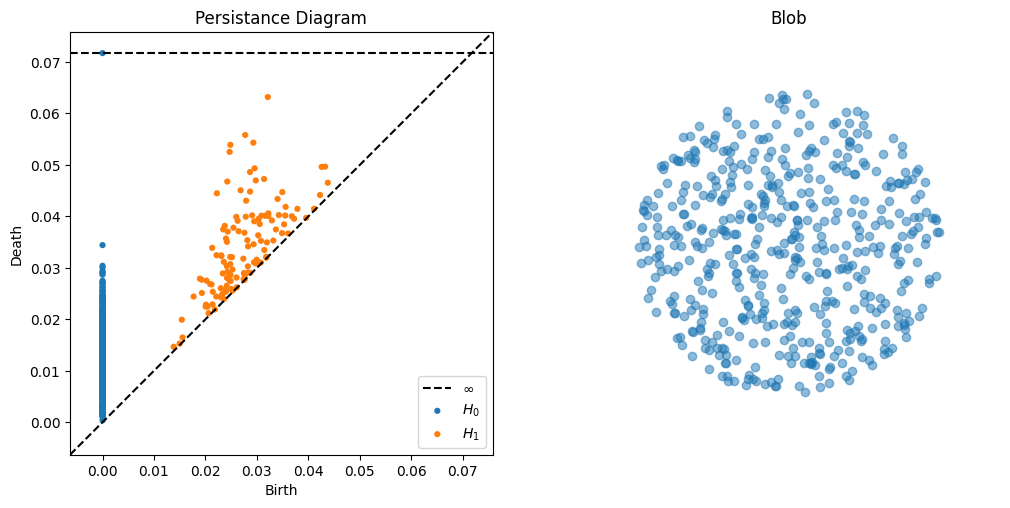

In [47]:
fig = plt.figure(figsize=(12,10)) 
ax = fig.add_subplot(1, 2, 1, )

theta = 2*np.pi*np.random.rand(500)
r = np.sqrt(np.random.rand(500))
x = 0.25*r*np.cos(theta)
y = 0.25*r*np.sin(theta)

blob = np.array([x, y]).T


rips = Rips()
diagrams = rips.fit_transform(blob)
rips.plot(diagrams)
ax.set_title('Persistance Diagram')

ax = fig.add_subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)
ax.grid('off')
ax.axis('off')
ax.set_title('Blob')
ax.set_aspect('equal')
plt.savefig('./persistence-blob.pdf')
